# 03. Naver Movie Ranking 

## 1. 네이버 영화 평점 사이트 분석
- https://movie.naver.com/ 
- 영화랭킹 탭 이동 
- 영화랭킹에서 평점순(현재상영영화) 선택

```
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210914
```

- 웹 페이지 주소에는 많은 정보가 담겨있습니다. 
- 원하는 정보를 얻기 위해서 변화시켜줘야 하는 주소의 규칙을 찾을 수 있습니다. 
- 여기에서는 날짜 정보를 변경해주면 해당 페이지에 접근이 가능합니다. 

In [1]:
# requirements 

import pandas as pd 
from urllib.request import urlopen 
from bs4 import BeautifulSoup

In [3]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210914"
response = urlopen(url)
# response.status 
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210914" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <me

In [4]:
# 영화 제목 태그 
soup.find_all("div", "tit5") # soup.select("div.tit5")

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=174830" title="가버나움">가버나움</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10249" title="모던 타임즈">모던 타임즈</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10341" title="위대한 독재자">위대한 독재자</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=19335" title="해피 투게더">해피 투게더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=173692" title="바울">바울</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=190324" title="프리 가이">프리 가이</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=200896" title="꽃다발 같은 사랑을 했다">꽃다발 같은 사랑을 했다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=182387" title="윤희에게">윤희에게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=91031" title="신세계">신세계</a>

In [9]:
# 1 
soup.find_all("div", "tit5")[0].a.string

'가버나움'

In [12]:
# 2 
soup.select(".tit5")[0].find("a").text

'가버나움'

In [13]:
# 3 
soup.select(".tit5")[0].select_one("a").get_text()

'가버나움'

In [14]:
# 영화 평점 태그 
soup.find_all("td", "point") # soup.select(".point")

[<td class="point">9.59</td>,
 <td class="point">9.36</td>,
 <td class="point">9.32</td>,
 <td class="point">9.23</td>,
 <td class="point">9.19</td>,
 <td class="point">9.17</td>,
 <td class="point">9.10</td>,
 <td class="point">9.09</td>,
 <td class="point">8.96</td>,
 <td class="point">8.93</td>,
 <td class="point">8.92</td>,
 <td class="point">8.92</td>,
 <td class="point">8.91</td>,
 <td class="point">8.85</td>,
 <td class="point">8.80</td>,
 <td class="point">8.78</td>,
 <td class="point">8.77</td>,
 <td class="point">8.59</td>,
 <td class="point">8.58</td>,
 <td class="point">8.55</td>,
 <td class="point">8.48</td>,
 <td class="point">8.47</td>,
 <td class="point">8.47</td>,
 <td class="point">8.39</td>,
 <td class="point">8.34</td>,
 <td class="point">8.31</td>,
 <td class="point">8.25</td>,
 <td class="point">8.14</td>,
 <td class="point">8.11</td>,
 <td class="point">8.10</td>,
 <td class="point">8.10</td>,
 <td class="point">8.04</td>,
 <td class="point">7.95</td>,
 <td class

In [17]:
len(soup.find_all("td", "point")), len(soup.find_all("div", "tit5"))

(47, 47)

In [20]:
soup.find_all("td", class_="point")[0].text, soup.select("td.point")[0].string

('9.59', '9.59')

In [22]:
# 영화제목 리스트 

end = len(soup.find_all("div", "tit5"))

movie_name = [] 

for n in range(0, end):
    movie_name.append(
        soup.find_all("div", "tit5")[n].a.string
    )
movie_name

['가버나움',
 '코다',
 '모던 타임즈',
 '위대한 독재자',
 '해피 투게더',
 '바울',
 '프리 가이',
 '꽃다발 같은 사랑을 했다',
 '윤희에게',
 '신세계',
 '더 파더',
 '이별의 아침에 약속의 꽃을 장식하자',
 '중경삼림',
 '천로역정: 천국을 찾아서',
 '너의 이름은.',
 '부에나 비스타 소셜 클럽',
 '화양연화',
 '캡틴 판타스틱',
 '드림걸즈',
 '분노',
 '노매드랜드',
 '블랙 위도우',
 '아비정전',
 '너의 췌장을 먹고 싶어',
 '모가디슈',
 '메기',
 '우리의 20세기',
 '이스케이프 룸 2: 노 웨이 아웃',
 '릴리 슈슈의 모든 것',
 '하나와 앨리스',
 '너의 췌장을 먹고 싶어',
 '맨 인 더 다크 2 ',
 '날씨의 아이',
 '죄 많은 소녀',
 '소셜 네트워크',
 '그린 나이트',
 '독전',
 '기담',
 '호우시절',
 '인질',
 '더 수어사이드 스쿼드',
 '레미니센스',
 '싱크홀',
 '올드',
 '샹치와 텐 링즈의 전설',
 '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?',
 '귀문']

In [26]:
movie_name = [soup.select(".tit5")[n].a.text for n in range(0, end)]
movie_name

['가버나움',
 '코다',
 '모던 타임즈',
 '위대한 독재자',
 '해피 투게더',
 '바울',
 '프리 가이',
 '꽃다발 같은 사랑을 했다',
 '윤희에게',
 '신세계',
 '더 파더',
 '이별의 아침에 약속의 꽃을 장식하자',
 '중경삼림',
 '천로역정: 천국을 찾아서',
 '너의 이름은.',
 '부에나 비스타 소셜 클럽',
 '화양연화',
 '캡틴 판타스틱',
 '드림걸즈',
 '분노',
 '노매드랜드',
 '블랙 위도우',
 '아비정전',
 '너의 췌장을 먹고 싶어',
 '모가디슈',
 '메기',
 '우리의 20세기',
 '이스케이프 룸 2: 노 웨이 아웃',
 '릴리 슈슈의 모든 것',
 '하나와 앨리스',
 '너의 췌장을 먹고 싶어',
 '맨 인 더 다크 2 ',
 '날씨의 아이',
 '죄 많은 소녀',
 '소셜 네트워크',
 '그린 나이트',
 '독전',
 '기담',
 '호우시절',
 '인질',
 '더 수어사이드 스쿼드',
 '레미니센스',
 '싱크홀',
 '올드',
 '샹치와 텐 링즈의 전설',
 '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?',
 '귀문']

In [28]:
# 영화평점 리스트 
end = len(soup.find_all("td", "point"))

movie_point = [soup.find_all("td", "point")[n].string for n in range(0, end)]
movie_point

['9.59',
 '9.36',
 '9.32',
 '9.23',
 '9.19',
 '9.17',
 '9.10',
 '9.09',
 '8.96',
 '8.93',
 '8.92',
 '8.92',
 '8.91',
 '8.85',
 '8.80',
 '8.78',
 '8.77',
 '8.59',
 '8.58',
 '8.55',
 '8.48',
 '8.47',
 '8.47',
 '8.39',
 '8.34',
 '8.31',
 '8.25',
 '8.14',
 '8.11',
 '8.10',
 '8.10',
 '8.04',
 '7.95',
 '7.92',
 '7.84',
 '7.57',
 '7.52',
 '7.49',
 '7.40',
 '7.36',
 '7.08',
 '7.03',
 '6.78',
 '6.72',
 '6.65',
 '6.51',
 '4.45']

In [30]:
# 전체 데이터 수 확인 

len(movie_name), len(movie_point)

(47, 47)

## 2. 자동화를 위한 코드

```
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210914
```
- 날짜만 변경하면 우리가 원하는 기간 만큼 데이터를 얻을 수 있습니다.

In [31]:
date = pd.date_range("2021.01.01", periods=100, freq="D")
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [32]:
date[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [33]:
date[0].strftime("%Y-%m-%d")

'2021-01-01'

In [34]:
date[0].strftime("%Y.%m.%d")

'2021.01.01'

In [38]:
# 문자열 format 

test_string = "Hi, I'm {name}"
test_string.format(name="Zerobase")
test_string.format(name="Pinkwink")
# dir(test_string)

"Hi, I'm Pinkwink"

In [40]:
import time 
from tqdm import tqdm 

movie_date = [] 
movie_name = [] 
movie_point = [] 

for today in tqdm(date):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}"
    response = urlopen(url.format(date=today.strftime("%Y%m%d")))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all("td", "point"))
    
    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.select("div.tit5")[n].find("a").get_text() for n in range(0, end)])
    movie_point.extend([soup.find_all("td", "point")[n].string for n in range(0, end)])
    
    time.sleep(0.5)

100%|█████████████████████████████████████████| 100/100 [01:45<00:00,  1.06s/it]


In [41]:
len(movie_date), len(movie_name), len(movie_point)

(4793, 4793, 4793)

In [42]:
movie_point[:5]

['9.59', '9.52', '9.49', '9.40', '9.39']

In [43]:
movie_name[:5]

['가나의 혼인잔치: 언약', '언플랜드', '극장판 바이올렛 에버가든', '부활: 그 증거', '소년시절의 너']

In [44]:
movie = pd.DataFrame({
    "date": movie_date, 
    "name": movie_name,
    "point": movie_point
})
movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


In [45]:
movie.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 112.5+ KB


In [47]:
movie["point"] = movie["point"].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 112.5+ KB


In [48]:
# 데이터 저장 

movie.to_csv(
    "../data/03. naver_movie_data.csv", sep=",", encoding="utf-8"
)

## 3. 영화 평점 데이터 정리

In [75]:
import numpy as np 
import pandas as pd 

In [76]:
movie = pd.read_csv("../data/03. naver_movie_data.csv", index_col=0)
movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


- 영화 이름으로 인덱스를 잡습니다. 
- 점수의 합산을 구합니다.
- 100일 간 네이버 영화 평점 합산 기준 베스트&워스트 10 선정

In [78]:
# pivot table 

movie_unique = pd.pivot_table(data=movie, index="name", aggfunc=np.sum)
movie_unique

,point
name,
120BPM,2.76
1917,62.09
800,25.27
가나의 혼인잔치: 언약,501.68
건축학개론,78.03
...,...
해피 투게더,703.29
허트 로커,219.32
현기증,198.56


In [79]:
movie_best = movie_unique.sort_values(by="point", ascending=False) # 내림차순 
movie_best.head()

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12


In [83]:
tmp = movie.query("name == ['화양연화']")
tmp

,date,name,point
22,2021-01-01,화양연화,8.80
70,2021-01-02,화양연화,8.79
117,2021-01-03,화양연화,8.75
162,2021-01-04,화양연화,8.76
205,2021-01-05,화양연화,8.76
...,...,...,...
4571,2021-04-06,화양연화,8.79
4621,2021-04-07,화양연화,8.79
4668,2021-04-08,화양연화,8.79
4719,2021-04-09,화양연화,8.79


In [84]:
# 시각화 

import matplotlib.pyplot as plt 
from matplotlib import rc 

rc("font", family="Arial Unicode MS") # Windows: Malgun Gothic 
%matplotlib inline 
# get_ipython().run_line_magic("matplotlib", "inline")

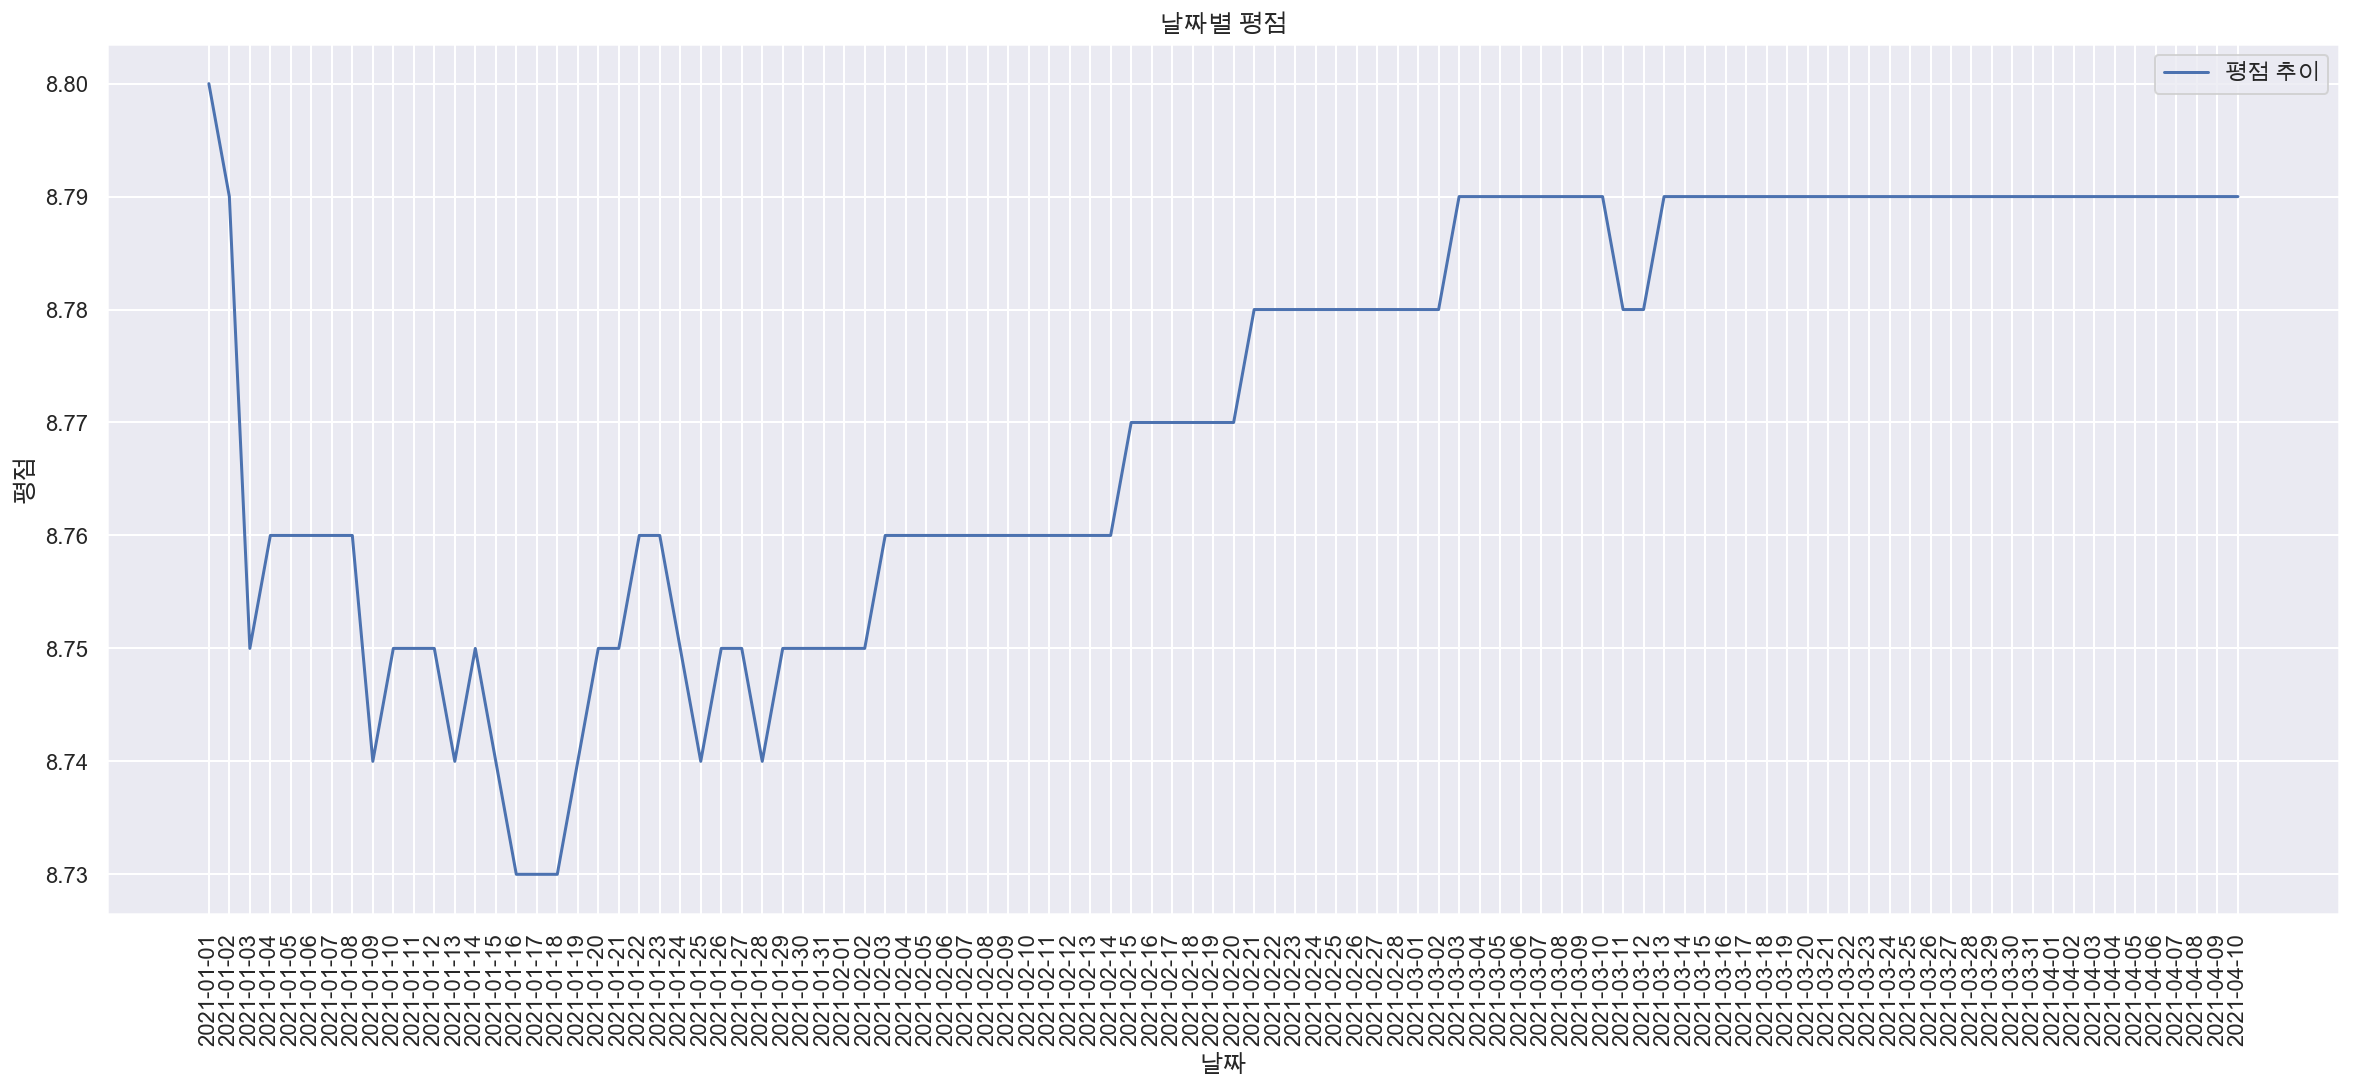

In [87]:
plt.figure(figsize=(20, 8)) # x 20, y, 8 
plt.plot(tmp["date"], tmp["point"]) # 선 그래프 x축 날짜, y축 평점 => 날짜에 따른 평점 변화를 선그래프로 표현(시계열)
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.legend(labels=["평점 추이"], loc="best")
plt.grid(True)
plt.show()

In [88]:
# 상위 10개 영화 
movie_best.head(10)

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12
타오르는 여인의 초상,833.51
너의 이름은.,817.40
아비정전,814.83
찬실이는 복도 많지,785.58


In [89]:
# 하위 10개 영화
movie_best.tail(10)

,point
name,
최악의 하루,23.40
열혈남아,23.16
영웅본색,18.36
너는 여기에 없었다,15.64
협상,14.64
고질라,13.34
초미의 관심사,7.37
레이니 데이 인 뉴욕,5.54
신 고질라,4.97


In [90]:
movie_pivot = pd.pivot_table(data=movie, index="date", columns="name", values="point")
movie_pivot.head()

name,120BPM,1917,800,가나의 혼인잔치: 언약,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,굿바이,귀여운 여인,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,협상,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,3.60,9.59,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.80
2021-01-02,NaN,NaN,3.60,9.56,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.79
2021-01-03,NaN,NaN,3.60,9.54,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.75
2021-01-04,NaN,NaN,3.61,9.51,NaN,NaN,NaN,NaN,9.04,8.7,...,NaN,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.76
2021-01-05,NaN,NaN,3.62,9.52,NaN,NaN,NaN,NaN,9.04,NaN,...,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,8.76


In [91]:
movie_pivot.to_excel("../data/03. movie_pivot.xlsx")

In [92]:
# movie_pivot.columns = movie_pivot.columns.droplevel()

In [93]:
import platform
import seaborn as sns 
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

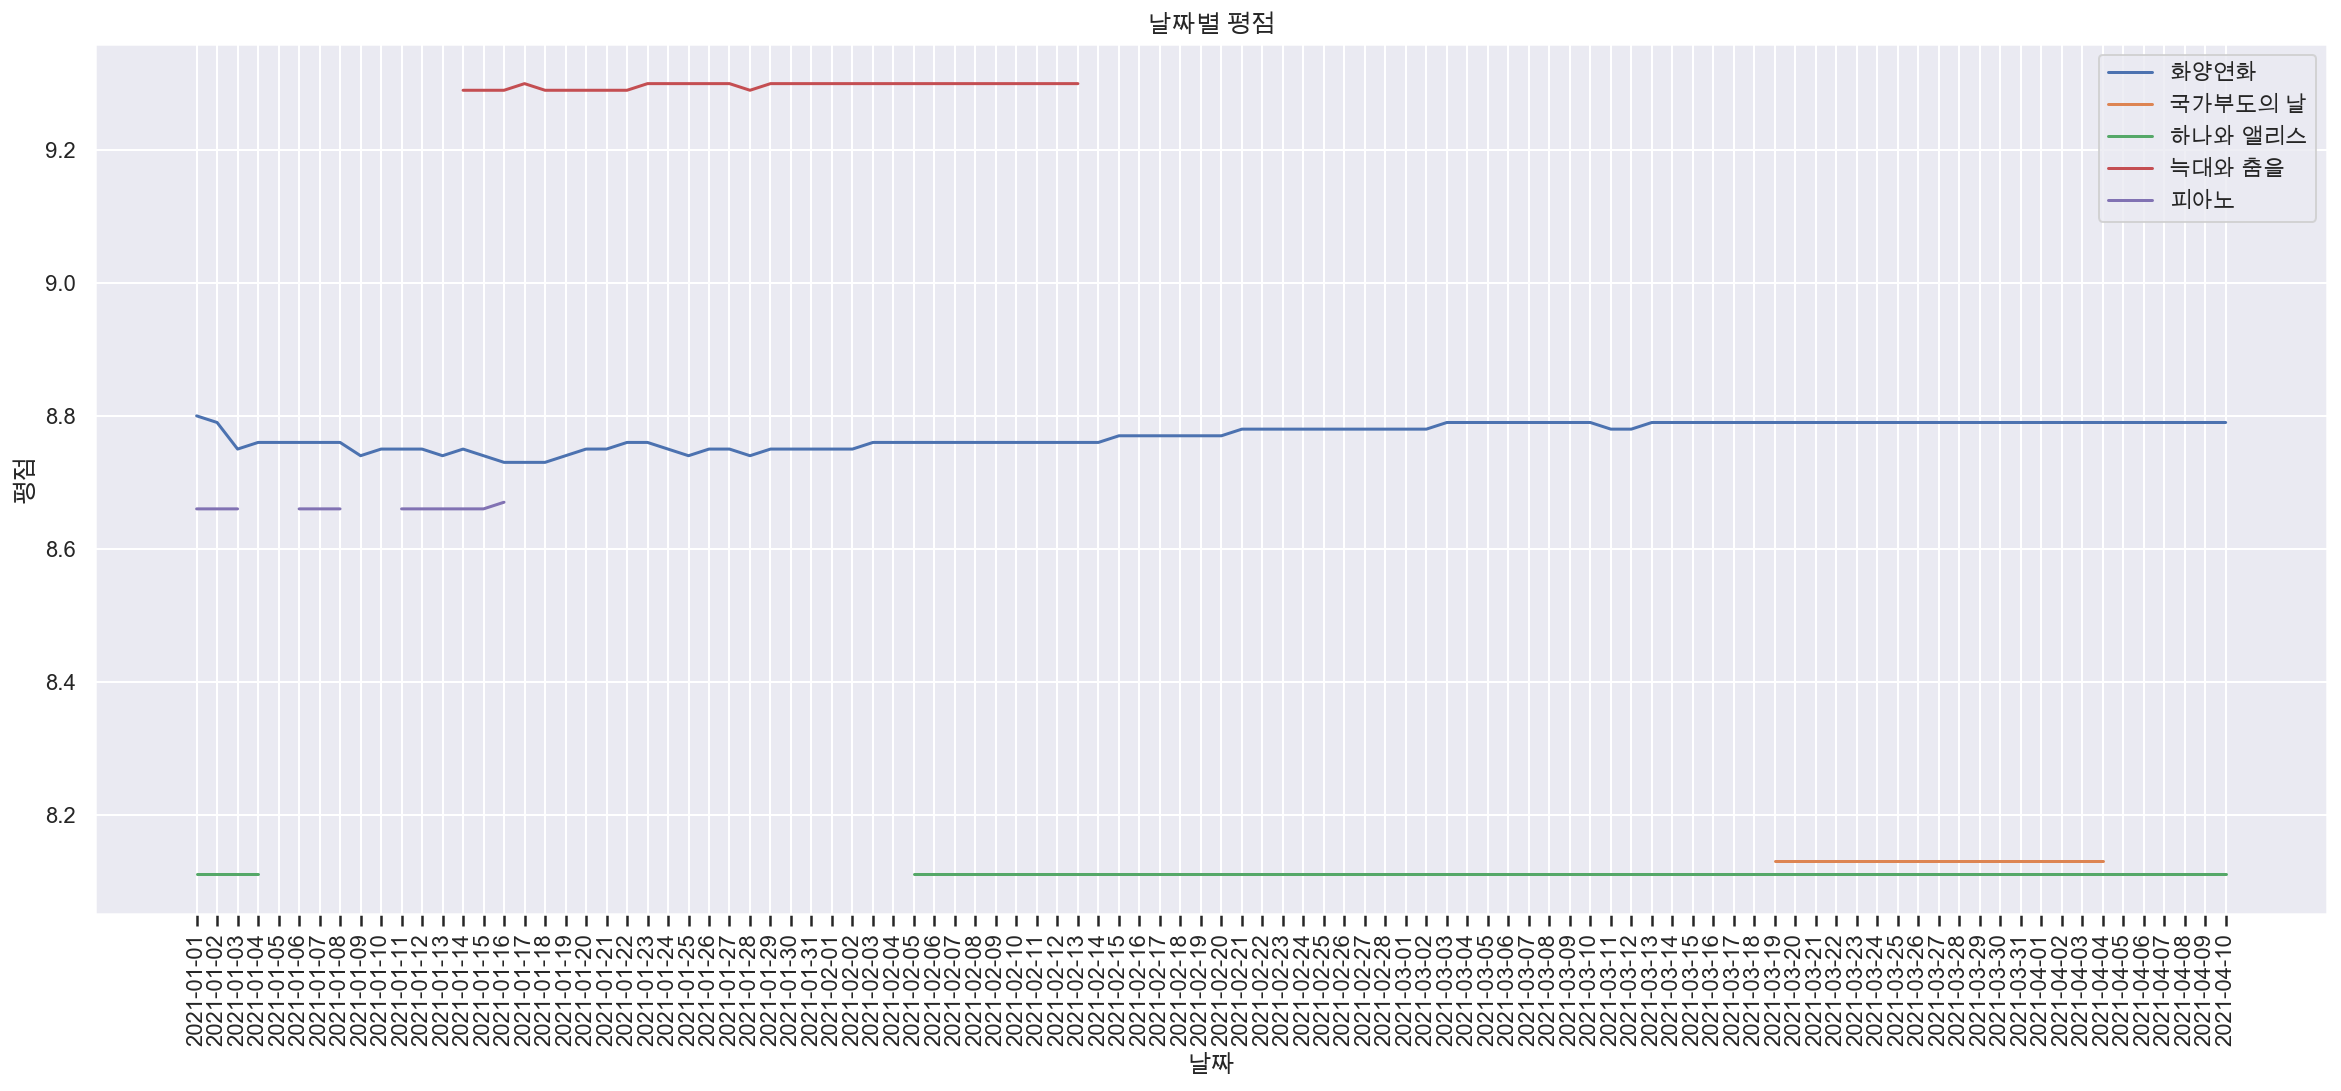

In [97]:
target_col = ["화양연화", "국가부도의 날", "하나와 앨리스", "늑대와 춤을", "피아노"]
plt.figure(figsize=(20, 8))
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.tick_params(bottom="off", labelbottom="off")
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc="best")
plt.grid(True)
plt.show()